import pandas เพื่อวิเคราะห์ข้อมูลสถิติ

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# เลือกฟอนต์ที่รองรับภาษาไทย เช่น TH Sarabun
plt.rcParams['font.family'] = ''


In [50]:
#copy path ของไฟล์data index.csv แล้วเอามาวาง
coff = pd.read_csv("/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/index.csv")

ข้อมูลสรุปเชิงสถิติและการกระจายตัวของข้อมูล
1.ยอดขายในแต่ละเดือนที่ขายกาแฟได้
2.ในแต่ละเดือนกาแฟในแต่ละเดื่อน
3.ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ
3.ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
4.หายอดขายกาแฟอะไรมากที่สุดในแต่ละเดือน
5.จำนวนลูกค้าในแต่ละวัน

In [51]:
coff.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [52]:
coff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1464 non-null   object 
 1   datetime     1464 non-null   object 
 2   cash_type    1464 non-null   object 
 3   card         1375 non-null   object 
 4   money        1464 non-null   float64
 5   coffee_name  1464 non-null   object 
dtypes: float64(1), object(5)
memory usage: 68.8+ KB


เตรียมข้อมูล

In [53]:
coff['month'] = coff['date'].apply(lambda x : x.split('-')[1])
coff['day'] = coff['date'].apply(lambda x : x.split('-')[2])
coff['hour'] = coff['datetime'].apply(lambda x : x.split(' ')[1][:2])
#ค่าเงินจากยูเครนฮรีฟเนีย (UAH) 25 ก.ย. 17:02 UTC 1uah = 0.79 บาท
#1 USD = 41.42  UAH
coff['money_THB'] = coff['money']*0.79

def get_time_period(hour):
    if '07' <= hour < '12':
        return 'Morning'
    elif '12' <= hour < '18':
        return 'Afternoon'
    else:
        return 'Evening'

coff['time_period'] = coff['hour'].apply(get_time_period)
coff['date'] = pd.to_datetime(coff['date'])
# สร้างคอลัมน์ 'day_of_week' ที่เก็บชื่อวันในสัปดาห์
coff['day_of_week'] = coff['date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
coff['day_of_week'] = pd.Categorical(coff['day_of_week'], categories=days_order, ordered=True)
coff.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,03,01,10,30.573,Morning,Friday
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,03,01,12,30.573,Afternoon,Friday
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,03,01,13,22.831,Afternoon,Friday
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,03,01,13,30.573,Afternoon,Friday


In [54]:
# โหลดข้อมูลจากไฟล์ Excel
dataTemp = pd.read_excel('/home/gamgamgam/Documents/Term1SecondYear/204203/coffee_sale/data/export.xlsx')

# แสดงข้อมูลเบื้องต้น
dataTemp.info()

# ตรวจสอบชื่อคอลัมน์ใน dataTemp
print("Columns in dataTemp DataFrame:", dataTemp.columns)

# ตรวจสอบชื่อคอลัมน์ใน coff2
print("Columns in coff2 DataFrame:", coff.columns)

# แปลงคอลัมน์วันที่ในทั้งสอง DataFrame เป็น datetime
dataTemp['date'] = pd.to_datetime(dataTemp['date'])
coff['date'] = pd.to_datetime(coff['date'])

# รวมข้อมูล
coff = pd.merge(coff, dataTemp[['date', 'tavg']], on='date', how='left')

# เปลี่ยนชื่อคอลัมน์ tavg เป็น temperature
coff.rename(columns={'tavg': 'temperature'}, inplace=True)

# แสดงผลลัพธ์
print(coff.tail(50))  # แสดงผล 50 แถวสุดท้าย

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    214 non-null    object 
 1   tavg    214 non-null    float64
 2   tmin    214 non-null    float64
 3   tmax    214 non-null    float64
 4   prcp    206 non-null    float64
 5   snow    2 non-null      float64
 6   wdir    214 non-null    int64  
 7   wspd    214 non-null    float64
 8   wpgt    0 non-null      float64
 9   pres    214 non-null    float64
 10  tsun    0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 18.5+ KB
Columns in dataTemp DataFrame: Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')
Columns in coff2 DataFrame: Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'month', 'day', 'hour', 'money_THB', 'time_period', 'day_of_week'],
      dtype='object'

In [55]:
coff

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,03,01,10,30.5730,Morning,Friday,4.7
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,03,01,13,22.8310,Afternoon,Friday,4.7
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,03,01,13,30.5730,Afternoon,Friday,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2024-09-05,2024-09-05 20:30:14.964,card,ANON-0000-0000-0587,32.82,Cappuccino,09,05,20,25.9278,Evening,Thursday,22.9
1460,2024-09-05,2024-09-05 20:54:24.429,card,ANON-0000-0000-0588,23.02,Americano,09,05,20,18.1858,Evening,Thursday,22.9
1461,2024-09-05,2024-09-05 20:55:31.429,card,ANON-0000-0000-0588,32.82,Cappuccino,09,05,20,25.9278,Evening,Thursday,22.9
1462,2024-09-05,2024-09-05 21:26:28.836,card,ANON-0000-0000-0040,27.92,Americano with Milk,09,05,21,22.0568,Evening,Thursday,22.9


In [56]:
coff.describe()

,date,money,money_THB,temperature
count,1464,1464.000000,1464.000000,1464.000000
mean,2024-06-08 20:59:00.983606528,32.013661,25.290792,17.607240
min,2024-03-01 00:00:00,18.120000,14.314800,-1.300000
25%,2024-04-24 00:00:00,27.920000,22.056800,13.200000
50%,2024-06-07 12:00:00,32.820000,25.927800,19.900000
75%,2024-07-30 00:00:00,37.720000,29.798800,22.600000
max,2024-09-05 00:00:00,40.000000,31.600000,29.600000
std,NaN,5.317022,4.200447,7.182431


หาค่ากลางหรือค่ามัธยฐาน ค่าความแปรปรวน และค่าฐานนิยม

In [57]:
mode = coff['money'].mode().iloc[0]
var = coff['money'].var()
med = coff['money'].median()

print(f"ฐานนิยม: {mode}")
print(f"ค่าความแปรปรวน: {var}")
print(f"ค่ามัธยฐาน: {med}")

ฐานนิยม: 32.82
ค่าความแปรปรวน: 28.270722334898345
ค่ามัธยฐาน: 32.82


In [58]:
print(f"จำนวนแถวของข้อมูล : {coff.shape[0]}")
print(f"จำนวนแถวของข้อมูล : {coff.shape[1]}")

จำนวนแถวของข้อมูล : 1464
จำนวนแถวของข้อมูล : 13


การกระจายตัวของข้อมูลนี้ (สร้างตารางควอไทล์)

In [59]:
Q1 = coff['money_THB'].quantile(0.25)
Q3 = coff['money_THB'].quantile(0.75)
#หา Q1 Q3 ด้วย เปอร์เซ็นพาย
IQR = Q3 - Q1

print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")
print(f"ค่าเฉลี่ยของข้อมูล : {coff['money_THB'].mean()}")

# Define outlier range
lower_bound = Q1 - 1.5 * IQR # ถ้าน้อยกว่าค่านี้จะเป็นค่าผิดปกติ
upper_bound = Q3 + 1.5 * IQR # ถ้ามากกว่าจะเป็นค่าผิดปกติ

print(f"lower_bound : {lower_bound}")
print(f"upper_bound : {upper_bound}")
coff2 = coff[(coff['money_THB'] >= lower_bound) & (coff['money_THB'] <= upper_bound)] # ลบ data ที่ผิดปกติออกทั้งแถว!

Q1 : 22.056800000000003
Q3 : 29.7988
IQR : 7.741999999999997
ค่าเฉลี่ยของข้อมูล : 25.290792349726775
lower_bound : 10.443800000000007
upper_bound : 41.4118


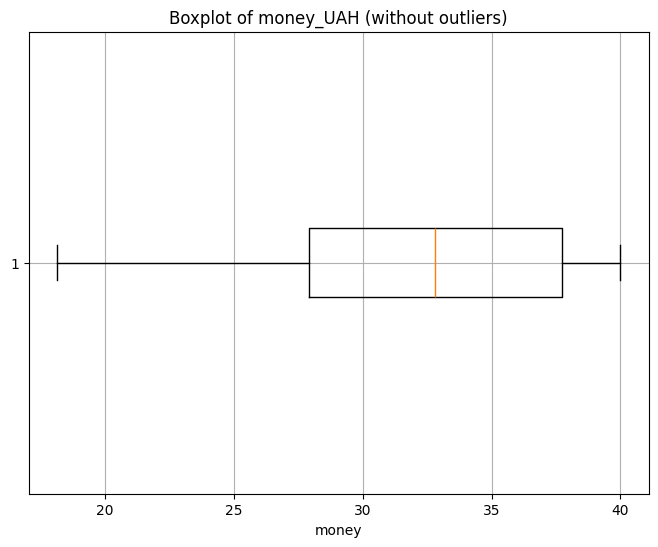

In [60]:
# Plot boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(coff2['money'], vert=False)
plt.title('Boxplot of money_UAH (without outliers)')
plt.xlabel('money')
plt.grid(True)
plt.show()

จากการตรวจสอบการกระจายของข้อมูล พบว่ามีข้อมูลที่ผิดปกติอยู่หนึ่งค่าที่ไม่สามารถอธิบายได้ว่าเกิดจากอะไร เราได้ทำการเช็ควันที่ขายกาแฟวันนั้นแล้วก็มีค่ากาแฟชนิดนี้ซึ่งไม่เกิน30สิบ แล้วก็ดูค่าเฉลี่ยของกาแฟชนิดก็ไม่เกิน 30 เช่นกัน จากนั้นเราก็ได้ตรวจสอบการใข้บัตรของลูกค้าคนนี้ก็พบว่าการที่ลูกค่ามาซื้อของวันอื่นก็ไม่ได้มีค่าที่ผิดปกติอะไร เราจึงทำการดรอปข้อมูลนี้ทิ้งไป

In [61]:
ans2 = coff[(coff['money_THB'] <= lower_bound) | (coff['money_THB'] >= upper_bound)]
print(ans2)

Empty DataFrame
Columns: [date, datetime, cash_type, card, money, coffee_name, month, day, hour, money_THB, time_period, day_of_week, temperature]
Index: []


ข้อมูลของกาแฟที่สูงที่สุด (สร้างกราฟให้หน่อย)

In [62]:
result = coff2[coff2['money'] == coff['money'].max()]
graf = result.groupby(['coffee_name', 'month']).size().unstack()
result

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte,03,02,10,31.6,Morning,Saturday,3.4
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte,03,03,10,31.6,Morning,Sunday,1.7
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte,03,07,10,31.6,Morning,Thursday,-1.3
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte,03,07,11,31.6,Morning,Thursday,-1.3
60,2024-03-09,2024-03-09 11:49:37.292,cash,NaN,40.0,Hot Chocolate,03,09,11,31.6,Morning,Saturday,1.9
76,2024-03-10,2024-03-10 10:06:02.960,cash,NaN,40.0,Latte,03,10,10,31.6,Morning,Sunday,2.6
81,2024-03-11,2024-03-11 10:18:46.724,cash,NaN,40.0,Latte,03,11,10,31.6,Morning,Monday,-0.2
82,2024-03-11,2024-03-11 11:24:15.022,cash,NaN,40.0,Cappuccino,03,11,11,31.6,Morning,Monday,-0.2
89,2024-03-12,2024-03-12 10:15:00.297,cash,NaN,40.0,Latte,03,12,10,31.6,Morning,Tuesday,-0.7
105,2024-03-14,2024-03-14 10:02:12.241,cash,NaN,40.0,Latte,03,14,10,31.6,Morning,Thursday,3.1


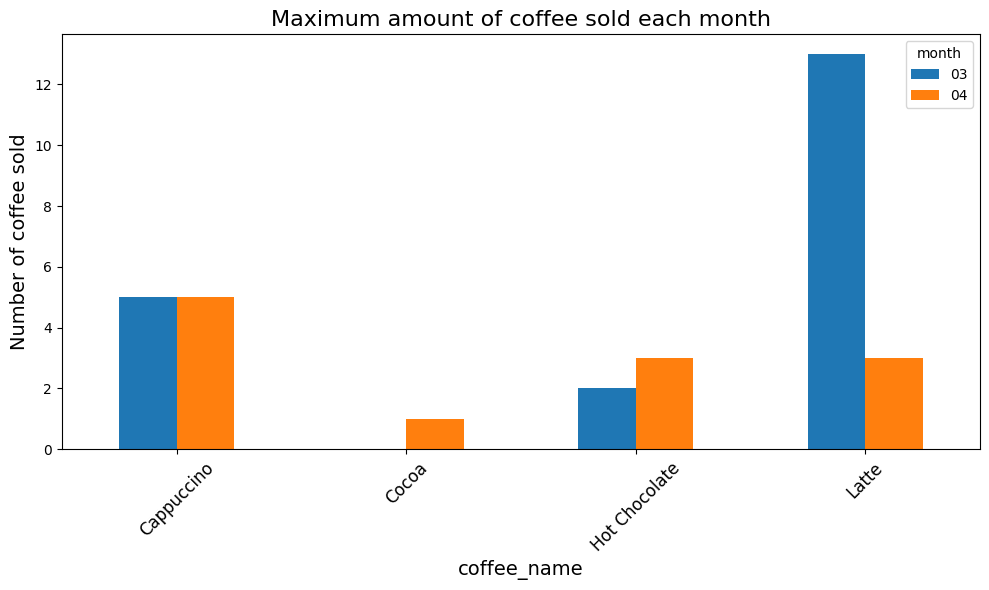

In [63]:
# สร้างกราฟแท่ง
graf.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Maximum amount of coffee sold each month', fontsize=16)
plt.xlabel('coffee_name', fontsize=14)
plt.ylabel('Number of coffee sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='month')
plt.tight_layout()

# แสดงกราฟ
plt.show()

ข้อมูลของกาแฟที่น้อยที่สุด (สร้างกราฟให้หน่อย)

In [64]:
result = coff2[coff2['money_THB'] == coff['money_THB'].min()]
result

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
977,2024-07-18,2024-07-18 11:11:23.434,card,ANON-0000-0000-0381,18.12,Espresso,07,18,11,14.3148,Morning,Thursday,24.4
1024,2024-07-24,2024-07-24 09:54:37.456,card,ANON-0000-0000-0402,18.12,Espresso,07,24,09,14.3148,Morning,Wednesday,22.8
1027,2024-07-24,2024-07-24 14:45:49.766,card,ANON-0000-0000-0012,18.12,Espresso,07,24,14,14.3148,Afternoon,Wednesday,22.8
1041,2024-07-25,2024-07-25 21:06:50.002,card,ANON-0000-0000-0404,18.12,Espresso,07,25,21,14.3148,Evening,Thursday,21.6
1046,2024-07-26,2024-07-26 09:20:34.344,card,ANON-0000-0000-0059,18.12,Espresso,07,26,09,14.3148,Morning,Friday,23.6
1063,2024-07-27,2024-07-27 12:26:13.159,card,ANON-0000-0000-0040,18.12,Espresso,07,27,12,14.3148,Afternoon,Saturday,23.2
1065,2024-07-27,2024-07-27 14:28:41.904,card,ANON-0000-0000-0225,18.12,Espresso,07,27,14,14.3148,Afternoon,Saturday,23.2
1073,2024-07-28,2024-07-28 11:07:25.920,card,ANON-0000-0000-0012,18.12,Espresso,07,28,11,14.3148,Morning,Sunday,24.9
1095,2024-07-30,2024-07-30 11:13:16.218,card,ANON-0000-0000-0426,18.12,Espresso,07,30,11,14.3148,Morning,Tuesday,18.6
1104,2024-07-30,2024-07-30 20:24:19.874,card,ANON-0000-0000-0434,18.12,Espresso,07,30,20,14.3148,Evening,Tuesday,18.6


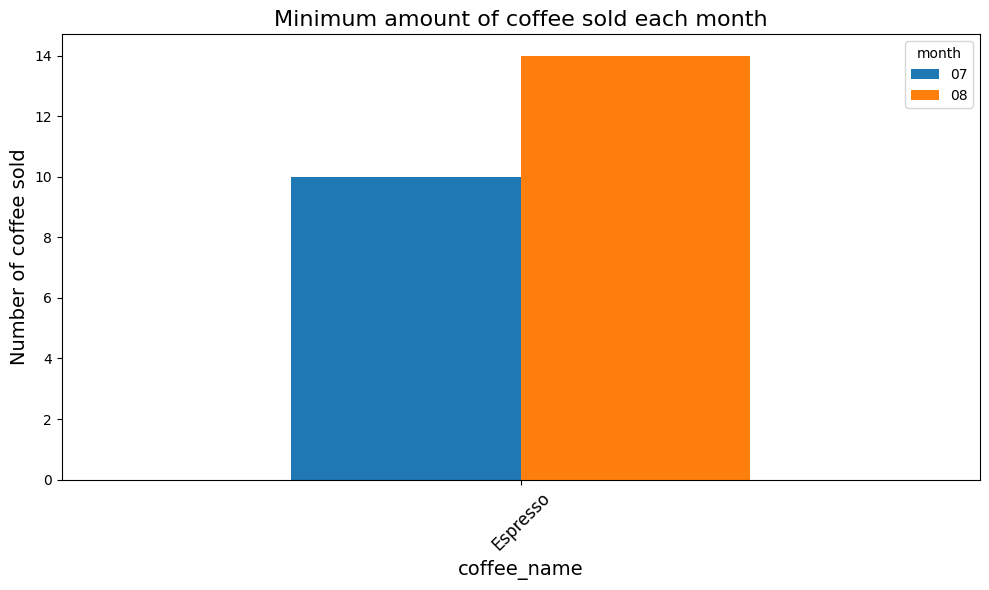

In [65]:
# สร้างกราฟแท่ง
graf = result.groupby(['coffee_name', 'month']).size().unstack()
graf.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Minimum amount of coffee sold each month', fontsize=16)
plt.xlabel('coffee_name', fontsize=14)
plt.ylabel('Number of coffee sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='month')
plt.tight_layout()

# แสดงกราฟ
plt.show()

ราคาเฉลี่ยของกาแฟแต่ละชนิด max min

In [66]:
coffee_mean = coff2.groupby(['coffee_name'])['money'].mean()
coffee_max = coff2.groupby(['coffee_name'])['money'].max()
coffee_min = coff2.groupby(['coffee_name'])['money'].min()
print("---------mean----------")
print(coffee_mean)
print("----------max----------")
print(coffee_max)
print("----------min----------")
print(coffee_min)

---------mean----------
coffee_name
Americano              26.560657
Americano with Milk    31.020776
Cappuccino             36.587448
Cocoa                  35.707059
Cortado                26.325674
Espresso               21.496825
Hot Chocolate          37.192500
Latte                  36.091772
Name: money, dtype: float64
----------max----------
coffee_name
Americano              30.0
Americano with Milk    35.0
Cappuccino             40.0
Cocoa                  40.0
Cortado                30.0
Espresso               25.0
Hot Chocolate          40.0
Latte                  40.0
Name: money, dtype: float64
----------min----------
coffee_name
Americano              23.02
Americano with Milk    27.92
Cappuccino             32.82
Cocoa                  32.82
Cortado                23.02
Espresso               18.12
Hot Chocolate          32.82
Latte                  32.82
Name: money, dtype: float64


จำนวนลูกค้าในแต่ละเดือน ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [67]:
ans = coff2['month'].value_counts().sort_index()
print(ans)

month
03    206
04    196
05    267
06    227
07    237
08    272
09     59
Name: count, dtype: int64


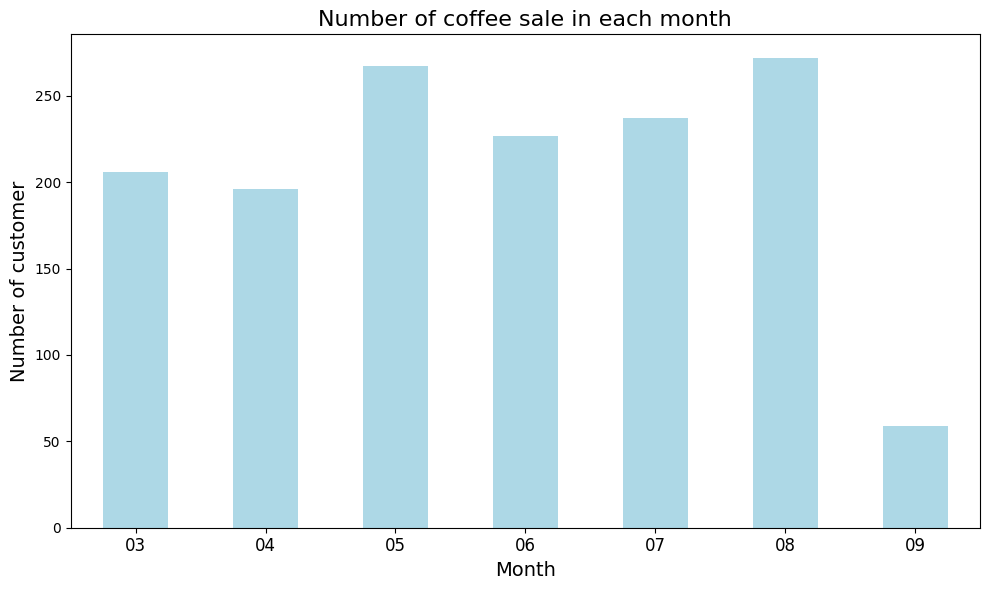

In [68]:
# สร้างกราฟแท่ง
ans.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffee sale in each month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of customer', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

ยอดขายในแต่ละเดือนที่ขายกาแฟได้ ตั้งแต่เดือน มีนาคม ถึง กันยายน  (สร้างกราฟให้หน่อย)

In [69]:
value = coff2.groupby(coff2['month'])['money'].sum().sort_index()
value


month
03    7050.20
04    6720.56
05    9063.42
06    7758.76
07    6915.94
08    7613.84
09    1745.28
Name: money, dtype: float64

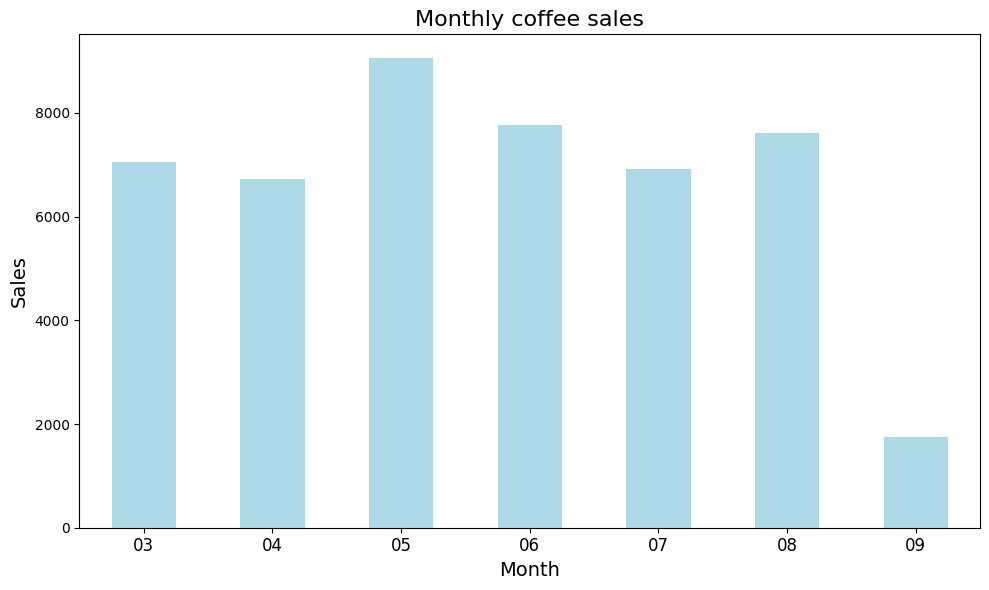

In [70]:
# สร้างกราฟแท่ง
value.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Monthly coffee sales', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

จำนวนการขายกาแฟในแต่ละครั้ง และยอดขาย (สร้างกราฟให้หน่อย)

In [71]:
value1 = coff2.groupby(['coffee_name']).size().sort_values()
value2 = coff2.groupby(['coffee_name'])['money'].sum().sort_values()
value3 = coff2.groupby(['coffee_name'])['money'].mean().sort_values()
print('จำนวนกาแฟที่ขายไป')
print(value1)
print('ยอดขายกาแฟ')
print(value2)
print('ราคาเฉลี่ยของกาแฟ')
print(value3)

จำนวนกาแฟที่ขายไป
coffee_name
Cocoa                   51
Espresso                63
Hot Chocolate           80
Cortado                141
Americano              213
Cappuccino             239
Latte                  316
Americano with Milk    361
dtype: int64
ยอดขายกาแฟ
coffee_name
Espresso                1354.30
Cocoa                   1821.06
Hot Chocolate           2975.40
Cortado                 3711.92
Americano               5657.42
Cappuccino              8744.40
Americano with Milk    11198.50
Latte                  11405.00
Name: money, dtype: float64
ราคาเฉลี่ยของกาแฟ
coffee_name
Espresso               21.496825
Cortado                26.325674
Americano              26.560657
Americano with Milk    31.020776
Cocoa                  35.707059
Latte                  36.091772
Cappuccino             36.587448
Hot Chocolate          37.192500
Name: money, dtype: float64


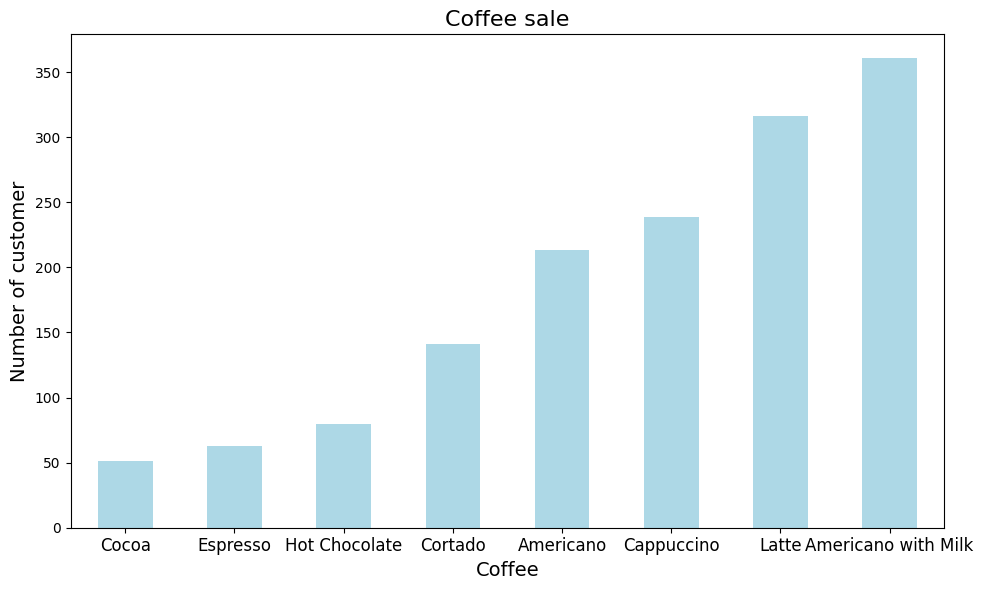

In [72]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value1.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Coffee sale', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Number of customer', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

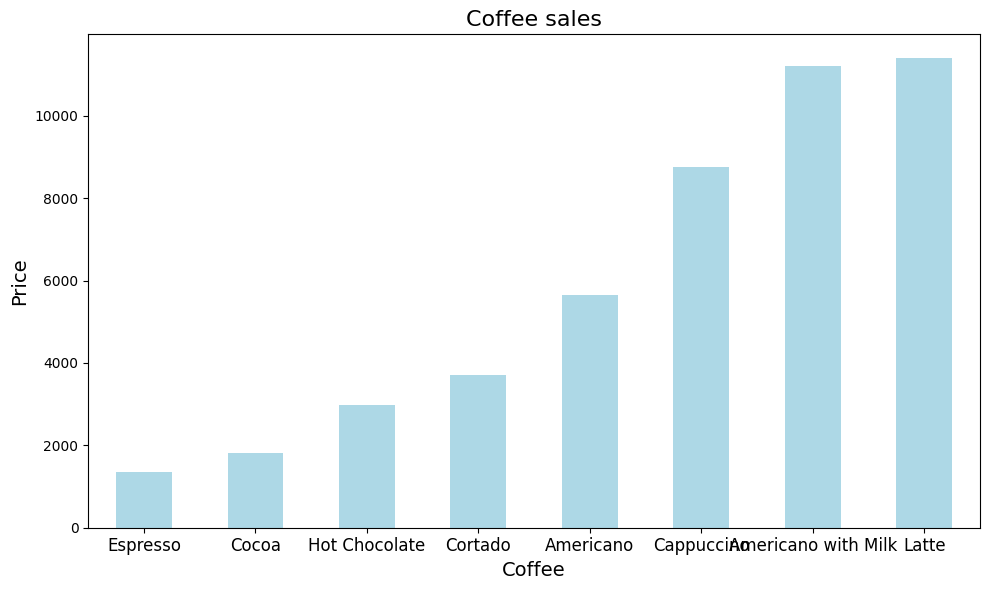

In [73]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value2.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Coffee sales', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

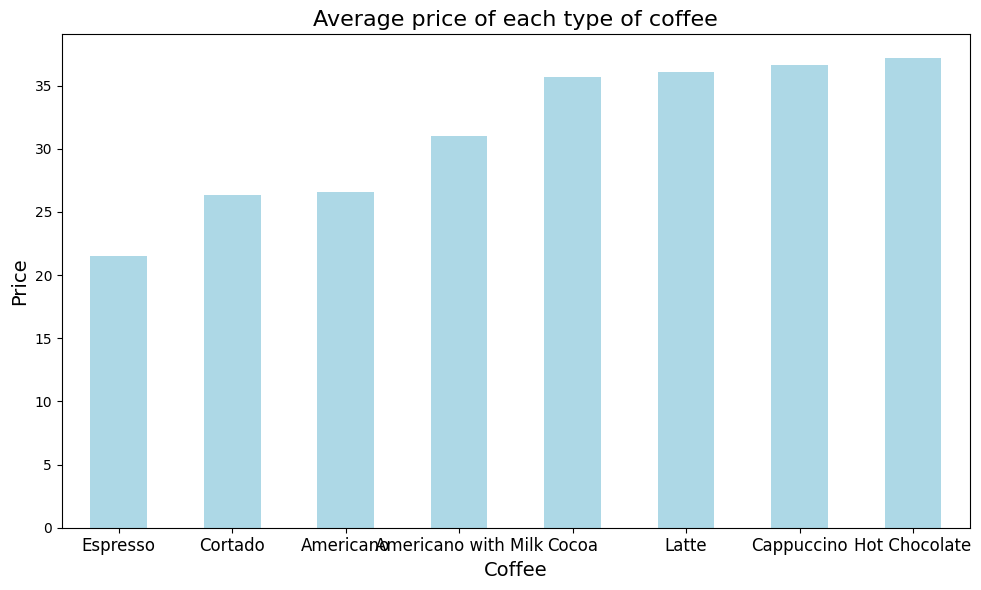

In [74]:
# สร้างกราฟแท่งโดยแต่ละแท่งมีสีที่แตกต่างกัน
colors = plt.cm.viridis(np.linspace(0, 1, len(value1)))  # ใช้ colormap 'viridis' เพื่อเลือกสีอัตโนมัติ

# สร้างกราฟแท่ง
value3.plot(kind='bar', figsize=(10, 6), color='lightblue')

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Average price of each type of coffee', fontsize=16)
plt.xlabel('Coffee', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()

# แสดงกราฟ
plt.show()

ยอดขายกาแฟในแต่ละเดือน (สร้างกราฟให้หน่อย)

In [75]:
value = coff2.groupby(['month','coffee_name']).size().unstack()
value

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
month,,,,,,,,
03,36.0,34.0,20.0,6.0,30.0,10.0,22.0,48.0
04,35.0,42.0,43.0,6.0,19.0,7.0,13.0,31.0
05,48.0,58.0,55.0,9.0,17.0,8.0,14.0,58.0
06,14.0,69.0,46.0,5.0,19.0,10.0,14.0,50.0
07,36.0,65.0,32.0,9.0,14.0,14.0,11.0,56.0
08,37.0,72.0,34.0,11.0,40.0,14.0,6.0,58.0
09,7.0,21.0,9.0,5.0,2.0,NaN,NaN,15.0


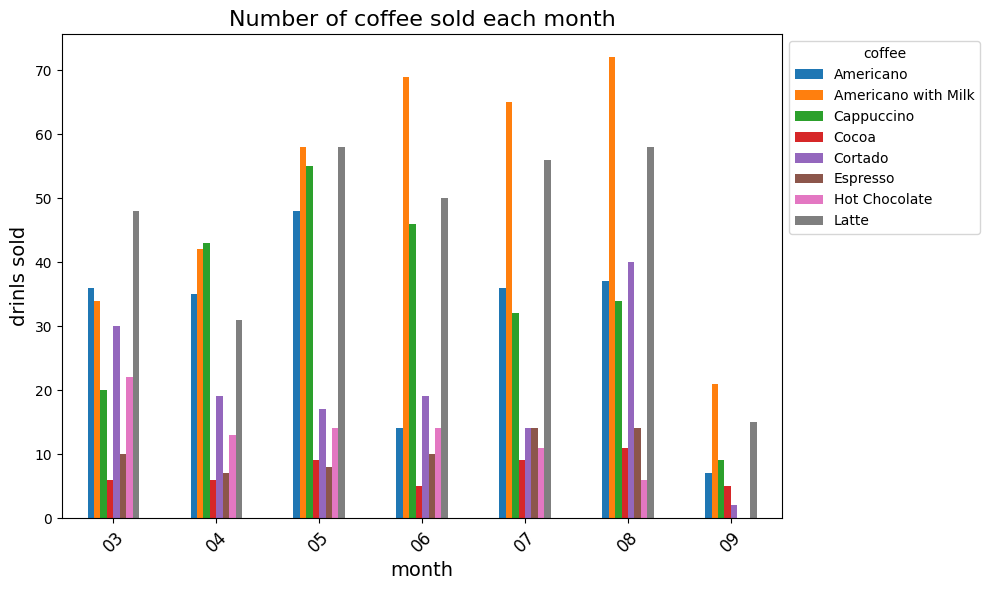

In [76]:
value.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffee sold each month', fontsize=16)
plt.xlabel('month', fontsize=14)
plt.ylabel('drinls sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='coffee', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

จะวิเคราะห์จำนวนแก้วที่ขายได้ว่ามีผลว่าจากอะไรบ้าง

In [77]:
temp = coff2.groupby('month')['temperature'].mean()

combined_df = pd.merge(value, temp, on='month')
combined_df

,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte,temperature
month,,,,,,,,,
03,36.0,34.0,20.0,6.0,30.0,10.0,22.0,48.0,4.200000
04,35.0,42.0,43.0,6.0,19.0,7.0,13.0,31.0,12.662245
05,48.0,58.0,55.0,9.0,17.0,8.0,14.0,58.0,17.092509
06,14.0,69.0,46.0,5.0,19.0,10.0,14.0,50.0,21.426872
07,36.0,65.0,32.0,9.0,14.0,14.0,11.0,56.0,22.878903
08,37.0,72.0,34.0,11.0,40.0,14.0,6.0,58.0,22.580515
09,7.0,21.0,9.0,5.0,2.0,NaN,NaN,15.0,24.376271


จากผลการวิเคราะห์ความสัมพันธ์ (correlation) ที่คุณได้แสดงมา จะเห็นได้ว่ามีความสัมพันธ์ระหว่างยอดขายกาแฟและอุณหภูมิในบางระดับ โดยตัวเลขที่ได้จะอยู่ในช่วง -1 ถึง 1 โดยที่:

ค่าใกล้เคียง 1 แสดงว่ามีความสัมพันธ์เชิงบวกสูง (เมื่อหนึ่งเพิ่ม อีกหนึ่งก็เพิ่มตาม)
ค่าใกล้เคียง -1 แสดงว่ามีความสัมพันธ์เชิงลบสูง (เมื่อหนึ่งเพิ่ม อีกหนึ่งจะลดลง)
ค่าใกล้เคียง 0 แสดงว่ามีความสัมพันธ์ต่ำ หรือไม่มีความสัมพันธ์กัน

                     Americano  Americano with Milk  Cappuccino     Cocoa  \
Americano             1.000000             0.361147    0.519014  0.694331   
Americano with Milk   0.361147             1.000000    0.673681  0.633687   
Cappuccino            0.519014             0.673681    1.000000  0.307801   
Cocoa                 0.694331             0.633687    0.307801  1.000000   
Cortado               0.511603             0.479575    0.208749  0.531671   
Espresso             -0.073466             0.598423   -0.497169  0.609016   
Hot Chocolate        -0.047436            -0.784155   -0.305880 -0.696039   
Latte                 0.672091             0.831825    0.580125  0.697354   
temperature          -0.421461             0.366822   -0.002659  0.252825   

                      Cortado  Espresso  Hot Chocolate     Latte  temperature  
Americano            0.511603 -0.073466      -0.047436  0.672091    -0.421461  
Americano with Milk  0.479575  0.598423      -0.784155  0.831825     

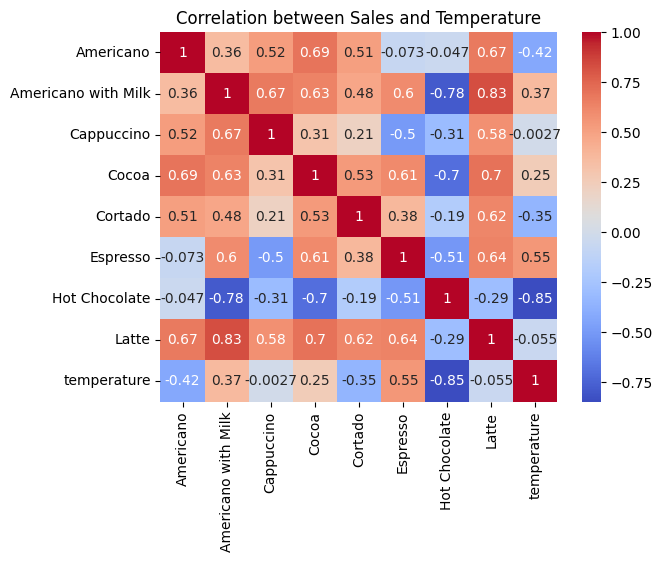

In [78]:
# การตรวจสอบความสัมพันธ์
correlation = combined_df.corr()
print(correlation)

# การสร้างกราฟ
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Temperature')
plt.show()


In [79]:
day_week_count = coff2.groupby(['day_of_week']).size()
day_week_count

/tmp/ipykernel_1033/2539387812.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_week_count = coff2.groupby(['day_of_week']).size()


day_of_week
Monday       200
Tuesday      237
Wednesday    209
Thursday     222
Friday       197
Saturday     201
Sunday       198
dtype: int64

ยอดขายกาแฟแต่ละชนิดในแต่ละสัปดาห์

In [80]:
day_week_coffee = coff2.groupby(['day_of_week','coffee_name']).size().unstack()
day_week_coffee

/tmp/ipykernel_1033/7630883.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_week_coffee = coff2.groupby(['day_of_week','coffee_name']).size().unstack()


coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
day_of_week,,,,,,,,
Monday,44,47,36,7,14,5,6,41
Tuesday,29,68,32,15,24,4,16,49
Wednesday,32,45,33,7,23,15,8,46
Thursday,33,50,39,1,20,12,14,53
Friday,34,42,23,8,20,10,15,45
Saturday,19,63,35,9,21,8,7,39
Sunday,22,46,41,4,19,9,14,43


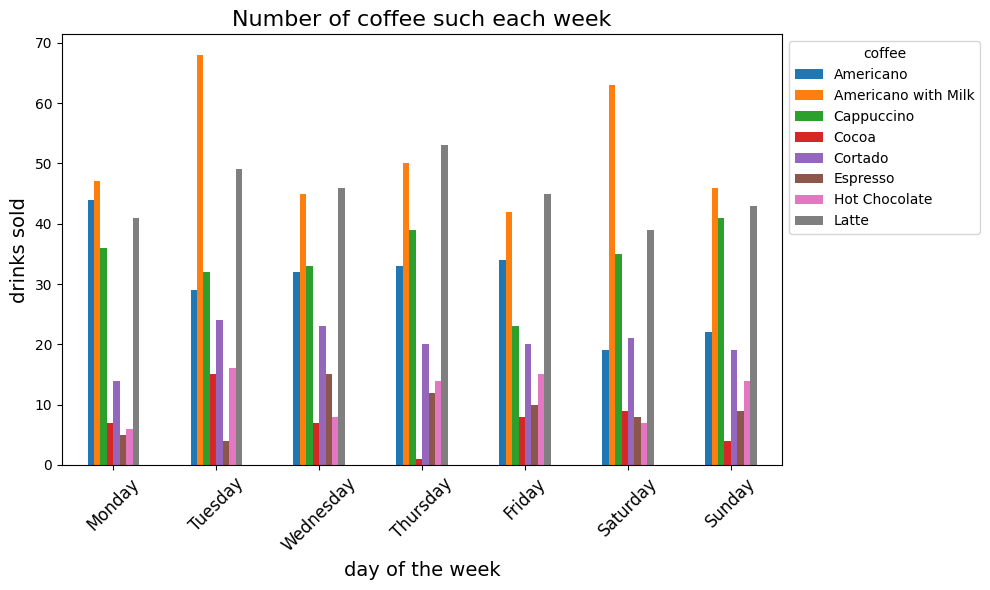

In [81]:
day_week_coffee.plot(kind='bar', figsize=(10, 6))

# กำหนดชื่อแกนและหัวข้อกราฟ
plt.title('Number of coffee such each week', fontsize=16)
plt.xlabel('day of the week', fontsize=14)
plt.ylabel('drinks sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='coffee', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [82]:
from scipy import stats
# ทำ ANOVA
f_statistic, p_value = stats.f_oneway(
    day_week_coffee['Americano'].dropna(),
    day_week_coffee['Americano with Milk'].dropna(),
    day_week_coffee['Cappuccino'].dropna(),
    day_week_coffee['Cocoa'].dropna(),
    day_week_coffee['Cortado'].dropna(),
    day_week_coffee['Espresso'].dropna(),
    day_week_coffee['Hot Chocolate'].dropna(),
    day_week_coffee['Latte'].dropna()
)

# แสดงผลลัพธ์
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if (p_value < 0.05) :
    print("ยอดขายกาแฟที่แตกต่างกันอย่างมีนัยสำคัญตามวันในสัปดาห์")
else :
    print("ยอดขายกาแฟที่แตกต่างกันอย่างมีนัยสำคัญตามวันในสัปดาห์")


F-statistic: 55.81206518631463
P-value: 6.64767455725828e-21
ยอดขายกาแฟที่แตกต่างกันอย่างมีนัยสำคัญตามวันในสัปดาห์


จากการวิเคราะห์ LSD ที่คุณได้ทำไปแล้ว เราสามารถสรุปเกี่ยวกับ **ความนิยมของกาแฟแต่ละชนิด** ได้ดังนี้:

### กาแฟที่มีความแตกต่างอย่างมีนัยสำคัญ
1. **Americano และ Americano with Milk**: มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 21.14) ซึ่งบ่งชี้ว่า **Americano with Milk** น่าจะเป็นที่นิยมมากกว่า **Americano** อย่างชัดเจนในกลุ่มลูกค้าที่ต้องการกาแฟที่มีรสนุ่มนวลขึ้น
   
2. **Americano กับหลายชนิด**: Americano มีความแตกต่างอย่างมีนัยสำคัญกับ **Cocoa**, **Cortado**, **Espresso**, **Hot Chocolate**, และ **Latte** ซึ่งแสดงว่าความนิยมของ Americano แตกต่างจากเมนูเหล่านี้ชัดเจน โดย **Americano มีแนวโน้มได้รับความนิยมมากกว่า** Espresso, Hot Chocolate, และ Cortado

3. **Americano with Milk กับหลายชนิด**: Americano with Milk มีความแตกต่างกับ **Cocoa**, **Cortado**, **Espresso**, และ **Hot Chocolate** ซึ่งชี้ให้เห็นว่า Americano with Milk ได้รับความนิยมมากกว่าเครื่องดื่มเหล่านี้ และได้รับความนิยมใกล้เคียงกับ **Latte**

4. **Cappuccino กับ Cocoa**: Cappuccino มีความแตกต่างอย่างมีนัยสำคัญกับ Cocoa (mean diff = 26.86) ซึ่งหมายความว่า **Cappuccino เป็นที่นิยมมากกว่า** Cocoa ในวันปกติ และแสดงถึงกลุ่มลูกค้าที่ชอบกาแฟผสมนมมากกว่าเครื่องดื่มช็อกโกแลต

5. **Cocoa กับ Cortado**: Cocoa มีความแตกต่างจาก Cortado โดยแสดงให้เห็นว่า **Cocoa ได้รับความนิยมมากกว่า Cortado** ซึ่ง Cortado อาจเป็นเมนูที่ไม่ค่อยเป็นที่นิยมในกลุ่มลูกค้าที่ชอบเครื่องดื่มหวานและนม

6. **Latte กับหลายชนิด**: Latte มีความแตกต่างอย่างมีนัยสำคัญกับหลายเมนู เช่น **Espresso**, **Hot Chocolate**, และ **Cortado** ซึ่งบ่งชี้ว่า **Latte มีแนวโน้มได้รับความนิยมมากกว่า**เครื่องดื่มที่เข้มข้นหรือหวานน้อยกว่า

### แนวโน้มของความนิยม
- **กาแฟที่มีกลิ่นนม** (เช่น **Americano with Milk**, **Cappuccino**, และ **Latte**) ดูเหมือนจะได้รับความนิยมมากกว่า **กาแฟที่เข้มข้น** (เช่น **Espresso** และ **Cortado**) และ **เครื่องดื่มที่มีส่วนผสมของช็อกโกแลต** (เช่น **Hot Chocolate** และ **Cocoa**)
  
- เมนูที่มี **ความแตกต่างน้อย** (เช่น Americano กับ Cappuccino) อาจหมายความว่ากลุ่มลูกค้าที่ดื่มกาแฟเข้มชอบทั้งสองแบบใกล้เคียงกัน ซึ่งอาจเป็นโอกาสในการทำการตลาดเฉพาะกลุ่ม

- **วันในสัปดาห์**: วันทำงานอาจเป็นช่วงที่เครื่องดื่มที่เข้มข้นหรือมีส่วนผสมของนม เช่น Americano with Milk หรือ Latte เป็นที่นิยมมากกว่า ในขณะที่เครื่องดื่มเบาๆ อย่าง Cocoa อาจขายดีในวันหยุด

### การปรับกลยุทธ์
- เพิ่มการโปรโมตเมนูที่ได้รับความนิยมน้อยกว่า (เช่น **Espresso** และ **Cortado**) โดยใช้ข้อได้เปรียบด้านรสชาติเฉพาะตัวที่แตกต่างจากเมนูอื่นๆ
- ส่งเสริมกาแฟที่ผสม **นมและหวาน** (เช่น **Americano with Milk** และ **Latte**) ในวันทำงานเพราะมีความนิยมสูง

การวิเคราะห์นี้สามารถช่วยให้คุณปรับกลยุทธ์การขายกาแฟได้ดีขึ้น

In [83]:
# คำนวณ MSE
# Residual Variance (สามารถได้จาก ANOVA)
# MSE = SS_residual / df_residual
# SS_residual = sum of squares of residuals (ใช้ค่า F-statistic คำนวณได้)
# df_residual = n - k (n = จำนวนข้อมูลทั้งหมด, k = จำนวนกลุ่ม)
n_total = day_week_coffee.count().sum()  # จำนวนข้อมูลทั้งหมด
k = day_week_coffee.shape[1]  # จำนวนกลุ่ม (coffee types)
df_residual = n_total - k  # degree of freedom สำหรับ residual
MSE = (f_statistic * df_residual) / (n_total - 1)

# คำนวณค่า LSD
alpha = 0.05  # ระดับความสำคัญ
t_value = stats.t.ppf(1 - alpha / 2, df_residual)  # ค่าตาราง t
n = day_week_coffee.count().min()  # ขนาดกลุ่มตัวอย่างที่น้อยที่สุด
LSD = t_value * np.sqrt((2 * MSE) / n)

print(f"MSE: {MSE}")
print(f"LSD: {LSD}")

# เปรียบเทียบค่าเฉลี่ยระหว่างกาแฟแต่ละชนิด
coffee_names = day_week_coffee.columns
for i in range(len(coffee_names)):
    for j in range(i + 1, len(coffee_names)):
        group1 = day_week_coffee[coffee_names[i]].dropna()
        group2 = day_week_coffee[coffee_names[j]].dropna()
        mean_diff = abs(np.mean(group1) - np.mean(group2))
        
        # ตรวจสอบว่าความแตกต่างมากกว่า LSD หรือไม่
        if mean_diff > LSD:
            print(f"{coffee_names[i]} และ {coffee_names[j]} มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = {mean_diff})")
        else:
            print(f"{coffee_names[i]} และ {coffee_names[j]} ไม่มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = {mean_diff})")

MSE: 48.708711435329135
LSD: 7.50071188933371
Americano และ Americano with Milk มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 21.142857142857142)
Americano และ Cappuccino ไม่มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 3.714285714285719)
Americano และ Cocoa มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 23.142857142857142)
Americano และ Cortado มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 10.285714285714285)
Americano และ Espresso มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 21.428571428571427)
Americano และ Hot Chocolate มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 19.0)
Americano และ Latte มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 14.714285714285719)
Americano with Milk และ Cappuccino มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 17.428571428571423)
Americano with Milk และ Cocoa มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 44.285714285714285)
Americano with Milk และ Cortado มีความแตกต่างกันอย่างมีนัยสำคัญ (mean diff = 31.428571428571427)
Americano with Milk และ Espresso มีความแตกต่างก

ในแต่ละเดือนผู้คนส่วนใหญ่ใช้อะไรในการจ่ายค่ากาแฟ

In [84]:
value_type = coff2.groupby(coff2['month'])['cash_type'].value_counts().unstack(fill_value=0)
value_type

cash_type,card,cash
month,,
03,175,31
04,168,28
05,241,26
06,223,4
07,237,0
08,272,0
09,59,0


กราฟการจ่ายเงินในแต่ละเดือนว่าเป็นอย่างไร

<Figure size 1000x700 with 0 Axes>

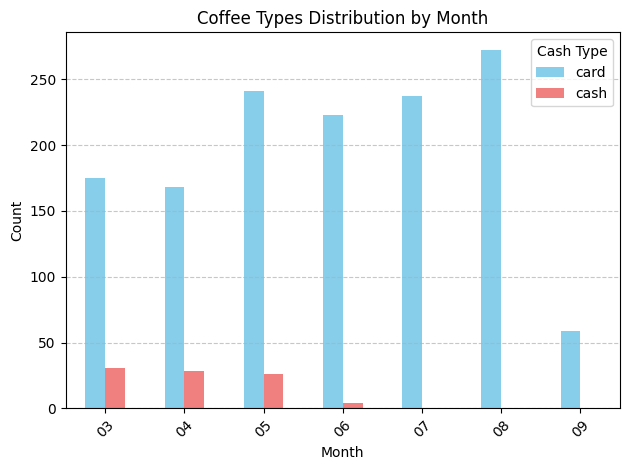

In [85]:
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 7))
value_type.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])  # กำหนดสีที่แตกต่าง
plt.title('Coffee Types Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # หมุนป้ายแกน x เพื่อให้อ่านง่ายขึ้น
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # ปรับให้พอดีกับกราฟ
plt.legend(title='Cash Type')  # เพิ่มตำนานให้กับประเภท
plt.show()

การจ่ายเงินในกาแฟแต่ละชนิด  (สร้างตาราง)

In [86]:
# สร้างตารางไขว้
crosstab_payment_drink = coff2.groupby(['coffee_name', 'cash_type']).size().unstack()
crosstab_payment_drink

cash_type,card,cash
coffee_name,,
Americano,199,14
Americano with Milk,346,15
Cappuccino,224,15
Cocoa,47,4
Cortado,136,5
Espresso,58,5
Hot Chocolate,74,6
Latte,291,25


<Figure size 1000x700 with 0 Axes>

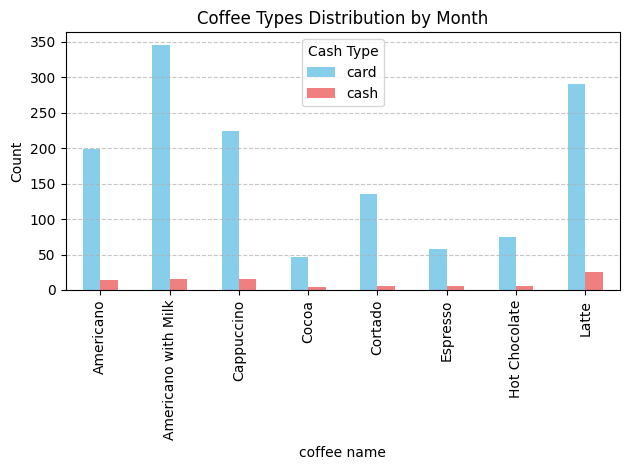

In [87]:
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 7))
crosstab_payment_drink.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])  # กำหนดสีที่แตกต่าง
plt.title('Coffee Types Distribution by Month')
plt.xlabel('coffee name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # หมุนป้ายแกน x เพื่อให้อ่านง่ายขึ้น
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # ปรับให้พอดีกับกราฟ
plt.legend(title='Cash Type')  # เพิ่มตำนานให้กับประเภท
plt.show()

การจ่ายเงินในกาแฟแต่ละจะจ่ายอยู่ที่เท่าไหร่

In [88]:
coffee_type = coff2.groupby(['coffee_name','cash_type'])['money'].mean().unstack()
coffee_type

cash_type,card,cash
coffee_name,,
Americano,26.358894,29.428571
Americano with Milk,30.868497,34.533333
Cappuccino,36.381250,39.666667
Cocoa,35.405532,39.250000
Cortado,26.190588,30.000000
Espresso,21.212069,24.800000
Hot Chocolate,36.978378,39.833333
Latte,35.786942,39.640000


<Figure size 1000x700 with 0 Axes>

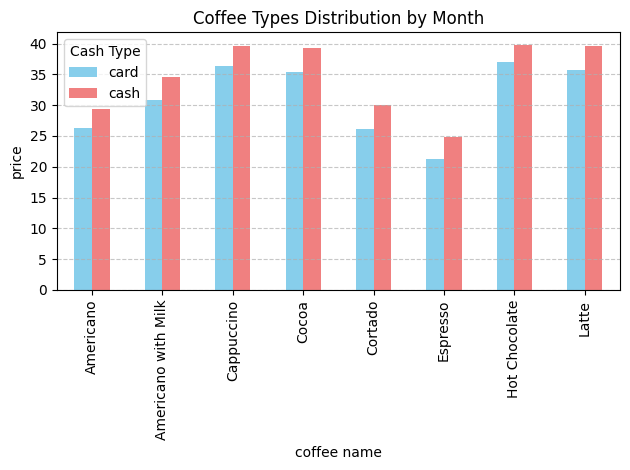

In [89]:
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 7))
coffee_type.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])  # กำหนดสีที่แตกต่าง
plt.title('Coffee Types Distribution by Month')
plt.xlabel('coffee name')
plt.ylabel('price')
plt.xticks(rotation=90)  # หมุนป้ายแกน x เพื่อให้อ่านง่ายขึ้น
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # ปรับให้พอดีกับกราฟ
plt.legend(title='Cash Type')  # เพิ่มตำนานให้กับประเภท
plt.show()

ช่วงเวลาที่ขายกาแฟได้มากที่สุดในแต่ละเดือน
เช้า (Morning): 07:00 - 12:00
บ่าย (Afternoon): 12:00 - 18:00
เย็น (Evening): 18:00 - 22:00
(สร้างกราฟให้หน่อย)

In [90]:
value = coff2.groupby('time_period').size()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']}")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']}")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']}")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 486
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 565
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 413


In [91]:
value = coff2.groupby('time_period')['money'].sum()

print(f"จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : {value['Morning']} บาท")
print(f"จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : {value['Afternoon']} บาท")
print(f"จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : {value['Evening']} บาท")

จำนวนข้อมูลในช่วงเช้า 07:00 - 12:00 : 14980.34 บาท
จำนวนข้อมูลในช่วงบ่าย 12:00 - 18:00 : 18146.02 บาท
จำนวนข้อมูลในช่วงเย็น 18:00 - 22:00 : 13741.64 บาท


ส่วนใหญ่ลูกค้าที่มาซื้อซ้ำจะกินกาแฟอะไร (ทำกราฟ)

In [92]:
coffee_repeat = coff2.groupby(['coffee_name','time_period']).size()
coffee_repeat

coffee_name          time_period
Americano            Afternoon       98
                     Evening         32
                     Morning         83
Americano with Milk  Afternoon      136
                     Evening         99
                     Morning        126
Cappuccino           Afternoon       93
                     Evening         92
                     Morning         54
Cocoa                Afternoon       18
                     Evening         21
                     Morning         12
Cortado              Afternoon       52
                     Evening         24
                     Morning         65
Espresso             Afternoon       33
                     Evening         12
                     Morning         18
Hot Chocolate        Afternoon       26
                     Evening         35
                     Morning         19
Latte                Afternoon      109
                     Evening         98
                     Morning        109
dtype: 

จำนวนคนที่มาซื้อซ้ำ

In [93]:
repeat_customers = coff2.groupby('card').filter(lambda x: len(x) > 1)
notrepeat_customers = coff2.groupby('card').filter(lambda x: len(x) == 1)
repeat_customers

,date,datetime,cash_type,card,money,coffee_name,month,day,hour,money_THB,time_period,day_of_week,temperature
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,03,01,10,30.5730,Morning,Friday,4.7
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,03,01,12,30.5730,Afternoon,Friday,4.7
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,03,01,13,22.8310,Afternoon,Friday,4.7
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,03,01,13,30.5730,Afternoon,Friday,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,2024-09-05,2024-09-05 17:05:31.684,card,ANON-0000-0000-0586,32.82,Cappuccino,09,05,17,25.9278,Afternoon,Thursday,22.9
1460,2024-09-05,2024-09-05 20:54:24.429,card,ANON-0000-0000-0588,23.02,Americano,09,05,20,18.1858,Evening,Thursday,22.9
1461,2024-09-05,2024-09-05 20:55:31.429,card,ANON-0000-0000-0588,32.82,Cappuccino,09,05,20,25.9278,Evening,Thursday,22.9
1462,2024-09-05,2024-09-05 21:26:28.836,card,ANON-0000-0000-0040,27.92,Americano with Milk,09,05,21,22.0568,Evening,Thursday,22.9


In [94]:
coffee_repeat = repeat_customers.groupby('coffee_name').size().sort_values()
coffee_repeat

coffee_name
Espresso                35
Cocoa                   38
Hot Chocolate           52
Cortado                111
Cappuccino             152
Americano              154
Latte                  210
Americano with Milk    257
dtype: int64

ลูกค้าที่ไม่ซื้อซ้ำซื้ออะไรไปกิน

In [95]:
coffee_notrepeat = notrepeat_customers.groupby('coffee_name').size().sort_values()
coffee_notrepeat

coffee_name
Cocoa                   9
Hot Chocolate          22
Espresso               23
Cortado                25
Americano              45
Cappuccino             72
Latte                  81
Americano with Milk    89
dtype: int64

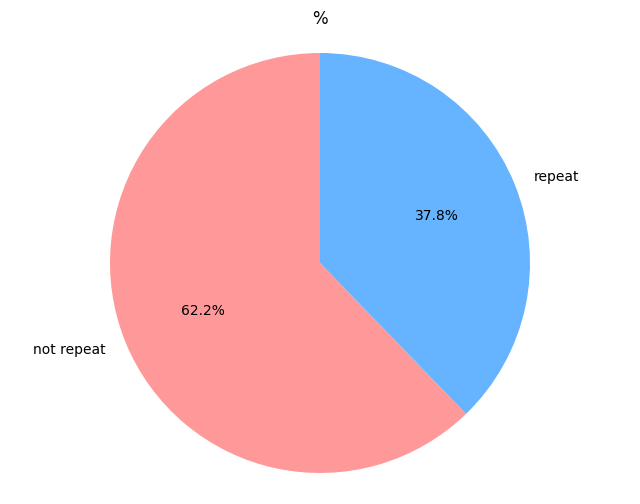

In [96]:
mabel = coff2.groupby(['card'])[['datetime']].nunique().sort_values("datetime", ascending=False)
Notrepeat = mabel[mabel['datetime']==1]
repeat =  mabel[mabel['datetime']>1]

# นับจำนวนของ Notrepeat และ repeat
notrepeat_count = len(Notrepeat)
repeat_count = len(repeat)


# สร้าง DataFrame สำหรับ Pie Chart
data_counts = {
    'type': ['not repeat', 'repeat'],
    'count': [notrepeat_count, repeat_count]
}

# แปลงเป็น DataFrame
data_df = pd.DataFrame(data_counts)

# สร้าง Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(data_df['count'], labels=data_df['type'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('%')
plt.axis('equal')  # ทำให้วงกลมเป็นวงกลมจริง
plt.show()